In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

## read trait information

In [2]:
df_LA = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_la.csv")
df_SLA = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_sla.csv")
df_LDMC = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_ldmc.csv")
df_d15n = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_d15n.csv")
df_d13c = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_d13c.csv")
df_pc = pd.read_csv(r"E:\wenqu\UAS_csv\vresion2\grouped_sla_la_ldmc.csv")
df_pn = pd.read_csv(r"E:\wenqu\UAS_csv\grouped_pn.csv")

In [3]:
df_pn

,site_quadrat,summed_sla_cover,la_cover,LDMC_cover,weighted_pc,weighted_d13c,weighted_pn,log_pn,weighted_d15n,b1_mean,...,b113_std,b114_std,b115_std,b116_std,b117_std,b118_std,b119_std,b120_std,b121_std,b122_std
0,S1B_1,142.017256,16.964266,0.399141,43.312469,-28.492351,1.599822,0.469893,-2.674121,0.008066,...,0.043727,0.039954,0.037774,0.036505,0.031699,0.034067,0.029817,0.037205,0.029428,0.042243
1,S1B_10,137.317848,19.273836,0.378223,39.021692,-28.543685,1.793593,0.584221,1.831298,0.009731,...,0.198313,0.074142,0.189852,0.078799,0.192470,0.080803,0.186395,0.084301,0.161744,0.079994
2,S1B_11,106.218469,21.611294,0.394541,28.722149,-26.496804,1.220057,0.198897,2.088882,0.009178,...,0.189777,0.070316,0.183232,0.071065,0.175422,0.073488,0.174616,0.078000,0.156058,0.081847
3,S1B_12,108.293186,12.971441,0.454268,49.725401,-27.295808,1.669954,0.512796,-1.259432,0.015963,...,0.348449,0.138326,0.329519,0.134143,0.340357,0.137214,0.337107,0.149233,0.307343,0.140250
4,S1B_14,128.988016,13.467315,0.428302,46.145474,-27.755471,1.496956,0.403434,-1.321241,0.013563,...,0.252416,0.073635,0.247089,0.073669,0.246966,0.075640,0.244557,0.080912,0.215159,0.088266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,S6A_2,99.966421,6.646571,0.526915,42.729909,-28.139459,1.385140,0.325801,-2.243014,0.001764,...,0.221164,0.041042,0.215201,0.040010,0.211748,0.037922,0.213296,0.039325,0.230566,0.046107
58,S6A_3,90.083637,8.562060,0.451583,43.400001,-27.593925,1.288065,0.253141,-1.346010,0.005791,...,0.219809,0.021686,0.216944,0.021668,0.211431,0.027552,0.213977,0.028577,0.209987,0.033540
59,S6A_4,99.138209,28.986345,0.370038,44.852165,-25.128604,1.873933,0.628039,2.988825,0.003569,...,0.083550,0.037987,0.075903,0.039146,0.075462,0.043852,0.077467,0.044924,0.089143,0.054125
60,S6A_5,109.347690,25.340909,0.381288,44.224496,-25.363508,1.586383,0.461457,4.010341,0.002972,...,0.076370,0.025011,0.075379,0.027088,0.071527,0.024816,0.069751,0.028198,0.087143,0.053418


## get band informationn

In [4]:
b_name_mean = []
b_name_std = []
for i in range(1, 123):
    b_mean = 'b' + str(i) + '_mean'
    b_name_mean.append(b_mean)
    b_std = 'b' + str(i) + '_std'
    b_name_std.append(b_std)
band_name = b_name_mean + b_name_std
band_name = np.array(band_name)
band_name

array(['b1_mean', 'b2_mean', 'b3_mean', 'b4_mean', 'b5_mean', 'b6_mean',
       'b7_mean', 'b8_mean', 'b9_mean', 'b10_mean', 'b11_mean',
       'b12_mean', 'b13_mean', 'b14_mean', 'b15_mean', 'b16_mean',
       'b17_mean', 'b18_mean', 'b19_mean', 'b20_mean', 'b21_mean',
       'b22_mean', 'b23_mean', 'b24_mean', 'b25_mean', 'b26_mean',
       'b27_mean', 'b28_mean', 'b29_mean', 'b30_mean', 'b31_mean',
       'b32_mean', 'b33_mean', 'b34_mean', 'b35_mean', 'b36_mean',
       'b37_mean', 'b38_mean', 'b39_mean', 'b40_mean', 'b41_mean',
       'b42_mean', 'b43_mean', 'b44_mean', 'b45_mean', 'b46_mean',
       'b47_mean', 'b48_mean', 'b49_mean', 'b50_mean', 'b51_mean',
       'b52_mean', 'b53_mean', 'b54_mean', 'b55_mean', 'b56_mean',
       'b57_mean', 'b58_mean', 'b59_mean', 'b60_mean', 'b61_mean',
       'b62_mean', 'b63_mean', 'b64_mean', 'b65_mean', 'b66_mean',
       'b67_mean', 'b68_mean', 'b69_mean', 'b70_mean', 'b71_mean',
       'b72_mean', 'b73_mean', 'b74_mean', 'b75_mean', 'b76

In [5]:
len(band_name)  

244

## prepare y variable for each traits

In [6]:
y_weighted_sla = df_SLA['summed_sla_cover'].to_numpy()
y_weighted_la = df_LA['la_cover'].to_numpy()
y_weighted_LDMC = df_LDMC['LDMC_cover'].to_numpy()


y_weighted_pc = df_pc['weighted_pc'].to_numpy()
y_weighted_d13c = df_d13c['weighted_d13c'].to_numpy()
y_weighted_pn = df_pn['weighted_pn'].to_numpy()
y_weighted_d15n = df_d15n['weighted_d15n'].to_numpy()






In [7]:
# df_LA = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_SLA = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_LDMC = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_15n = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_13c = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_pc = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")
# df_pn = pd.read_csv(r"C:\Users\laral\Downloads\2023_updated\2023_updated\grouped_sla_la_ldmc.csv")

In [8]:
x_pc = np.array(df_pc[band_name])
x_pn = np.array(df_pn[band_name])
x_ldmc = np.array(df_LDMC[band_name])
x_la = np.array(df_LA[band_name])
x_sla = np.array(df_SLA[band_name])
x_d13c = np.array(df_d13c[band_name])
x_d15n = np.array(df_d15n[band_name])

In [9]:
x_la

array([[0.00806591, 0.02010676, 0.00535555, ..., 0.03720465, 0.02942773,
        0.04224313],
       [0.00973139, 0.02140905, 0.00694379, ..., 0.08430113, 0.16174362,
        0.07999398],
       [0.01596289, 0.0302402 , 0.00918104, ..., 0.14923255, 0.30734291,
        0.14025026],
       ...,
       [0.00356905, 0.00726204, 0.00571381, ..., 0.04492375, 0.08914278,
        0.05412532],
       [0.00297173, 0.00984673, 0.00391134, ..., 0.02819804, 0.08714251,
        0.05341773],
       [0.00331892, 0.00672721, 0.00407369, ..., 0.02323154, 0.19803156,
        0.04023387]])

## prepare site label information for each trait

In [10]:
labels_sla = [] 
for i in range(len(df_SLA['site_quadrat'])):
    
    site_name = df_SLA['site_quadrat'][i].split("_")[0]

    labels_sla.append(site_name)

In [11]:
labels_la = [] 
for i in range(len(df_LA['site_quadrat'])):    
    site_name = df_LA['site_quadrat'][i].split("_")[0]
    labels_la.append(site_name)

In [12]:
labels_ldmc = [] 
for i in range(len(df_LDMC['site_quadrat'])):    
    site_name = df_LDMC['site_quadrat'][i].split("_")[0]
    labels_ldmc.append(site_name)

In [13]:
labels_pc = [] 
for i in range(len(df_pc['site_quadrat'])):
    
    site_name = df_pc['site_quadrat'][i].split("_")[0]

    labels_pc.append(site_name)

In [14]:
labels_d13c = [] 
for i in range(len(df_d13c['site_quadrat'])):
    
    site_name = df_d13c['site_quadrat'][i].split("_")[0]

    labels_d13c.append(site_name)

In [15]:
labels_pn = [] 
for i in range(len(df_pn['site_quadrat'])):
    
    site_name = df_pn['site_quadrat'][i].split("_")[0]

    labels_pn.append(site_name)

In [16]:
labels_d15n = [] 
for i in range(len(df_d15n['site_quadrat'])):
    
    site_name = df_d15n['site_quadrat'][i].split("_")[0]

    labels_d15n.append(site_name)

In [17]:
print(len(labels_sla), len(labels_la), len(labels_ldmc), len(labels_pc), len(labels_d15n), len(labels_d13c), len(labels_pn))

52 54 54 65 51 51 62


In [18]:
print(len(labels_d15n), len(labels_la), len(labels_ldmc))

51 54 54


## leave one out cross validation plsr model

In [19]:
def pls_variable_selection(X, y, max_comp):
    
    # Define an MSE array to be populated
    mse = np.zeros((max_comp, X.shape[1] - max_comp +1 ))



    # Loop over the number of PLS components
    for i in range(max_comp):
        # print(i)
        
        # Regression with the specified number of components, using the full spectrum
        pls1 = PLSRegression(n_components=i + 1)
        pls1.fit(X, y)
        
        # Indices of sorted spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_.flatten()))
 
        # Sort spectra accordingly
        Xc = X[:, sorted_ind]
        
        max_j = min(Xc.shape[1] - (i + 1), mse.shape[1]) 
        # Discard one wavelength at a time from the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(max_j): 
            pls2 = PLSRegression(n_components=i + 1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y.astype(np.float64), cv=5)
          

            mse[i, j] = np.sqrt(mean_squared_error(y, y_cv))        
            

      

    
    stdout.write("\n")
    
    # Find the indices of the minimum non-NaN MSE values
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))

    
    print("Optimised number of PLS components: ", mseminx[0] + 1)
    print("Wavelengths to be kept ", (X.shape[1] - mseminy[0]))
    print('Optimised MSEP ', mse[mseminx, mseminy][0])
    stdout.write("\n")
 
    # Calculate PLS with optimal components and export values
    optimal_pls = PLSRegression(n_components=mseminx[0] + 1)
    optimal_pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(optimal_pls.coef_.flatten()))
 
    Xc = X[:, sorted_ind]
 
    return Xc[:, mseminy[0]:], mseminx[0] + 1, mseminy[0], sorted_ind

## train the model - plot the result based on different site label

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_predict
import csv

def simple_pls_cv(X, y, n_comp, labels, filename):
    


    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=5)


    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean square error for calibration and cross validation
    # rmse_c = mean_squared_error(y, y_c, squared=False)
    # rmse_cv = mean_squared_error(y, y_cv, squared=False)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    # print('RMSE calib: %5.3f' % rmse_c)
    # print('RMSE CV: %5.3f' % rmse_cv)

    # Plot regression 
    z = np.polyfit(y, y_cv, 1)
    print(z[1],z[0])
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'S1B': {'marker': 'o', 'color': 'red'},
            'S2A': {'marker': 's', 'color': 'blue'},
            'S2C': {'marker': 'P', 'color': 'yellow'},
            'S6A': {'marker': '^', 'color': 'green'}
        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
            
            
        for i, label in enumerate(labels):
            
            
            scatter_obj = ax.scatter(y_cv[i], y[i], marker=label_dict.get(label, label_dict['S6A'])['marker'],
                                     c=label_dict.get(label, label_dict['S6A'])['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)

        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()
        return pls 


## log transform y variable

In [21]:
log_y_weighted_sla = np.log(y_weighted_sla)
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_LDMC = np.log(y_weighted_LDMC)
log_y_weighted_pc = np.log(y_weighted_pc)
# log_y_weighted_d13c = np.log(y_weighted_d13c)
log_y_weighted_pn = np.log(y_weighted_pn)
# log_y_weighted_d15n = np.log(y_weighted_d15n)

# PC model 

In [22]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_pc, log_y_weighted_pc, 20)


Optimised number of PLS components:  20
Wavelengths to be kept  53
Optimised MSEP  0.05244789321478071



R2 calib: 0.964
R2 CV: 0.626
1.0265804279322193 0.7333105098450058
0 S1B 3.7238059963060692 3.768440552909456
1 S1B 3.696056834413052 3.6641177043211433
2 S1B 3.460163929455912 3.3576685672859976
3 S1B 3.8039332445657212 3.906515899116689
4 S1B 3.8681628756168625 3.8317988766154567
5 S1B 3.8438539149368904 3.793884463862024
6 S1B 3.75047218028858 3.8050286635806776
7 S1B 3.8608871248034395 3.8819079416058115
8 S1B 3.818123671436398 3.8644394221771052
9 S1B 3.8278567196144158 3.8591480085980128
10 S1B 3.875090787695036 3.8485616943980485
11 S1B 3.822393271009524 3.8681115429961737
12 S1B 3.8422738926123214 3.831202929482173
13 S1B 3.8149604446635905 3.8452963151403616
14 S1B 3.8110414332917824 3.837860041947044
15 S1B 3.7795483315089062 3.8329096934659193
16 S1B 3.823309467043829 3.7940074992025736
17 S1B 3.866711778944099 3.8210019790002216
18 S1B 3.924163388803221 3.883400616968332
19 S1B 3.719798968272656 3.700152974512112
20 S1B 3.832020938213951 3.7984467803977133
21 S1B 3.83690527

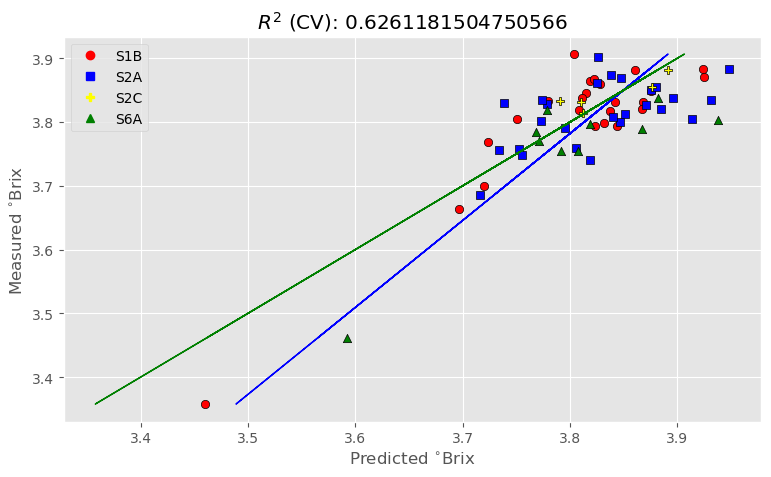

PLSRegression(n_components=20)

In [32]:
file_name_sla = r'D:\wenqu\chapter1_2\plot_level_model\244\pc.csv'
simple_pls_cv(opt_Xc, log_y_weighted_pc, ncomp, labels_pc,file_name_sla)

In [38]:
band_name[sorted_ind][wav:]

array(['b59_mean', 'b16_mean', 'b104_mean', 'b54_mean', 'b95_std',
       'b26_std', 'b108_std', 'b32_mean', 'b96_mean', 'b48_std',
       'b58_std', 'b64_std', 'b110_std', 'b113_mean', 'b82_mean',
       'b40_mean', 'b48_mean', 'b12_mean', 'b46_mean', 'b42_mean',
       'b99_std', 'b60_mean', 'b102_std', 'b103_std', 'b25_std',
       'b22_std', 'b91_mean', 'b62_std', 'b70_mean', 'b13_mean',
       'b29_mean', 'b86_std', 'b4_mean', 'b72_std', 'b88_std', 'b4_std',
       'b92_std', 'b104_std', 'b113_std', 'b84_mean', 'b56_std',
       'b115_std', 'b122_mean', 'b62_mean', 'b93_std', 'b109_std',
       'b80_std', 'b100_std', 'b22_mean', 'b9_mean', 'b120_mean',
       'b66_std', 'b112_std'], dtype='<U9')

In [39]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=27, scale=True)
pls_final.fit(opt_Xc,log_y_weighted_pc)



PLSRegression(n_components=27)

In [40]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [3.77388888 3.66795604 3.36726758 3.88730723 3.84554724]
Sklearn predictions: [3.77388888 3.66795604 3.36726758 3.88730723 3.84554724]
Max difference: 8.881784197001252e-16


In [41]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[9.757854058979868,
 -7.622386914650275,
 29.46640540308122,
 15.307956670681252,
 0.16453483873701957,
 5.7544409205014935,
 -0.8148820969585087,
 50.959328247295616,
 16.06198321119629,
 8.310811320281102,
 5.496855297407003,
 -2.438807321269299,
 3.967178065745288,
 5.560741368700168,
 -36.476238854335705,
 -46.64922548406604,
 -15.674191914325846,
 27.48603089065987,
 76.6858637109823,
 -6.789668573615507,
 2.5390663068372046,
 16.494174647914164,
 4.194203436402344,
 -1.2261055302580437,
 0.20111499327527654,
 -17.17474816569315,
 -5.30090233013682,
 4.530475774095848,
 -14.149015805120841,
 -1.146937014665361,
 -11.088280514529526,
 -1.0606915953440665,
 -10.402628547525275,
 -1.0917836626285995,
 -4.766451176721566,
 12.916891045838645,
 2.0016207836291375,
 4.300798187332688,
 -1.1238889510459504,
 3.8302757536641447,
 14.497806324667247,
 -2.439503742392824,
 -16.440812301256287,
 -18.773732245680023,
 -2.4515791159011573,
 3.59730927177485,
 -2.419259157594773,
 5.31633014945

In [42]:
transformed_intercept

array([3.69572846])

# PN

C:\Users\laral\Anaconda3\envs\WChen_2025\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\WChen_2025\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\WChen_2025\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\WChen_2025\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\laral\Anaconda3\envs\WChen_2025\lib\site-packages\sklearn\cross_decomposition\_pls.py:305: UserWarning: Y residual is constant at iteration 48



Optimised number of PLS components:  29
Wavelengths to be kept  69
Optimised MSEP  0.2162933697990063

R2 calib: 0.997
R2 CV: 0.378
0.09384235753884919 0.6714775799121043
0 S1B 0.4517613490687531 0.4698925987070734
1 S1B 0.7358043067547481 0.5842210573386667
2 S1B 0.48857890729917214 0.19889733307505286
3 S1B 0.7537203295222665 0.5127960697615571
4 S1B 0.5145855236187404 0.4034339186388153
5 S1B 0.27873089183528915 0.026225597943274455
6 S1B 0.7647814300613585 0.6586663699392942
7 S1B 0.4636846650483972 0.39272768918414447
8 S1B 0.3924645196325239 0.2223562806980066
9 S1B 0.5095571105346243 0.4545871384737593
10 S1B 0.2968062561277178 0.3576893637409396
11 S1B 0.8485783217818798 0.7422890833382898
12 S1B 0.2056238808016935 0.38851749721129836
13 S1B 0.3395264948627508 0.25715636301359845
14 S1B 0.2916689254802011 0.30882683544547823
15 S1B 0.5043673492644071 0.2577943189241944
16 S1B 0.49432723972018167 0.6128983235557623
17 S1B 0.6124808760831565 0.5715587228985487
18 S1B 0.505512262

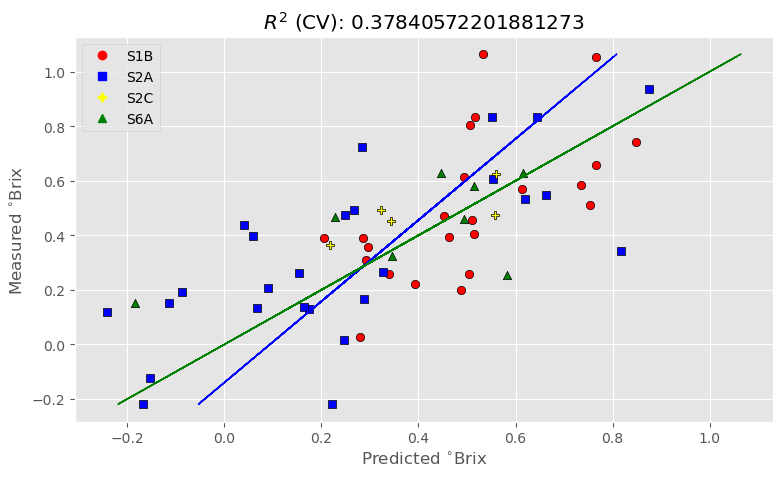

PLSRegression(n_components=29)

In [23]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_pn, log_y_weighted_pn, 50)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\pn.csv'
simple_pls_cv(opt_Xc, log_y_weighted_pn, ncomp, labels_pn, file_name)

In [24]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=29, scale=True)
pls_final.fit(opt_Xc,log_y_weighted_pn)


PLSRegression(n_components=29)

In [25]:
band_name[sorted_ind][wav:]

array(['b26_std', 'b53_mean', 'b78_std', 'b79_std', 'b46_mean',
       'b36_mean', 'b95_std', 'b48_std', 'b80_std', 'b103_std',
       'b102_std', 'b27_mean', 'b56_std', 'b10_std', 'b116_mean',
       'b111_mean', 'b8_std', 'b92_mean', 'b117_std', 'b74_std',
       'b81_std', 'b100_std', 'b25_std', 'b99_std', 'b112_mean',
       'b101_std', 'b6_std', 'b14_mean', 'b44_std', 'b119_mean',
       'b106_std', 'b28_mean', 'b48_mean', 'b121_mean', 'b9_mean',
       'b64_mean', 'b21_mean', 'b54_mean', 'b34_mean', 'b72_mean',
       'b88_std', 'b113_mean', 'b26_mean', 'b64_std', 'b16_mean',
       'b119_std', 'b74_mean', 'b96_std', 'b98_std', 'b13_mean',
       'b111_std', 'b100_mean', 'b4_mean', 'b29_mean', 'b1_mean',
       'b121_std', 'b68_mean', 'b118_std', 'b104_mean', 'b84_std',
       'b25_mean', 'b93_std', 'b60_mean', 'b122_mean', 'b18_mean',
       'b58_mean', 'b104_std', 'b113_std', 'b118_mean'], dtype='<U9')

In [26]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [0.46136476 0.55506105 0.21825927 0.53904916 0.43718157]
Sklearn predictions: [0.46136476 0.55506105 0.21825927 0.53904916 0.43718157]
Max difference: 3.9968028886505635e-15


In [27]:
transformed_intercept

array([0.5205581])

In [28]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[-6.251628768478961,
 32.16297703050638,
 -15.068628308076393,
 5.428252214364907,
 69.84643119591176,
 -27.685949618955107,
 4.40287919999009,
 5.735672607996701,
 34.02960449465758,
 -0.6118783449168849,
 16.023021175982127,
 -1.571890294710857,
 5.267401538413659,
 -4.667570565393137,
 47.49298377747452,
 40.13808656632717,
 14.338359073283067,
 -112.51008777647093,
 -1.8522656999577334,
 -14.03968939176024,
 -4.501391016442681,
 5.772067445321137,
 3.663699989711924,
 -3.6502597458464097,
 -12.996227746640129,
 3.4235185386475186,
 49.97093653774433,
 12.152042115741725,
 7.282388953435546,
 -7.946552505788617,
 -7.17802053622849,
 -15.041178522050824,
 116.62806221639276,
 -22.571467877855625,
 83.11794281129177,
 44.0430480907075,
 6.42955385330087,
 23.08306612593665,
 -75.66751432804995,
 47.65465880879377,
 -6.322995188871767,
 29.805238789786884,
 6.762371277451969,
 -6.2953441369896685,
 -126.35524998261204,
 -6.979214088893311,
 15.539067359637967,
 2.161169527958224,
 19.9

# d13c

In [23]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_d13c, y_weighted_d13c, 20)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\d13c.csv'


Optimised number of PLS components:  16
Wavelengths to be kept  45
Optimised MSEP  0.556521970291268



R2 calib: 0.988
R2 CV: 0.762
-4.394977684670774 0.8427817641890141
0 S1B -28.454192126205577 -28.49235106
1 S1B -27.674168324183025 -28.54368527
2 S1B -27.297367122949858 -27.29580842
3 S1B -27.913526577336558 -28.97319202
4 S1B -27.982865438273333 -28.6815368
5 S1B -27.078742524985667 -27.20402389
6 S1B -28.990628689138596 -28.96674046
7 S1B -27.21814789262946 -27.38240162
8 S1B -27.984805082665122 -27.15925765
9 S1B -27.930369887411995 -27.27176191
10 S1B -28.601918650416863 -28.729117
11 S1B -27.899214973793082 -28.43561468
12 S1B -26.852442313849775 -26.69813342
13 S1B -27.426850338955838 -27.25219021
14 S1B -28.78192104403094 -28.65229353
15 S1B -28.371597888197666 -27.46525833
16 S1B -27.61972425157497 -27.741047
17 S1B -28.2567310123382 -28.88539209
18 S1B -27.455397420078288 -28.20457812
19 S1B -27.253888359198044 -27.71653005
20 S1B -27.0787736567133 -27.35140639
21 S2A -29.02317908188802 -29.41902791
22 S2A -30.234248642441784 -29.4062208
23 S2A -28.459163628291876 -29.026253

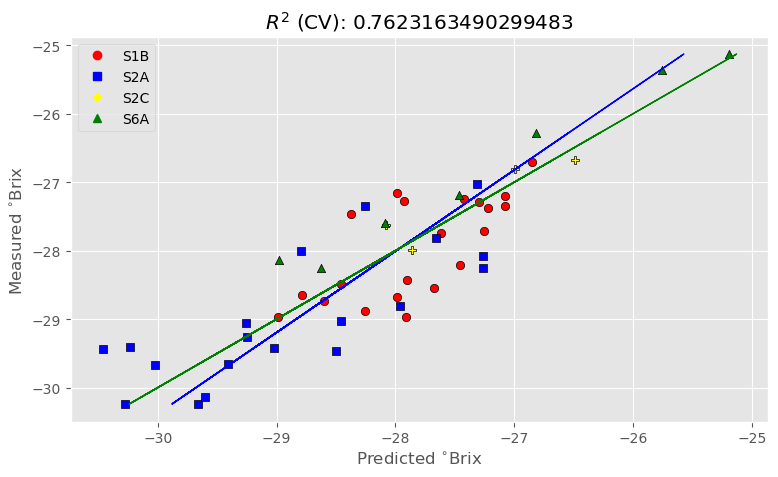

PLSRegression(n_components=16)

In [24]:

simple_pls_cv(opt_Xc, y_weighted_d13c, ncomp, labels_d13c, file_name)

In [25]:
band_name[sorted_ind][wav:]

array(['b99_mean', 'b25_std', 'b97_mean', 'b48_std', 'b109_mean',
       'b24_mean', 'b6_std', 'b64_mean', 'b3_mean', 'b58_mean',
       'b76_mean', 'b55_mean', 'b89_std', 'b104_std', 'b93_std',
       'b95_std', 'b120_std', 'b13_mean', 'b117_std', 'b48_mean',
       'b39_mean', 'b60_mean', 'b40_mean', 'b121_std', 'b6_mean',
       'b2_mean', 'b1_mean', 'b94_std', 'b53_mean', 'b56_mean',
       'b51_mean', 'b28_mean', 'b16_mean', 'b92_std', 'b122_std',
       'b7_mean', 'b52_mean', 'b42_mean', 'b114_std', 'b111_std',
       'b100_std', 'b34_mean', 'b15_mean', 'b8_mean', 'b26_mean'],
      dtype='<U9')

In [23]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=16, scale=True)
pls_final.fit(opt_Xc,y_weighted_d13c)



PLSRegression(n_components=16)

In [24]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [-28.70210595 -28.55923935 -27.28778538 -28.86170187 -28.45225713]
Sklearn predictions: [-28.70210595 -28.55923935 -27.28778538 -28.86170187 -28.45225713]
Max difference: 3.552713678800501e-15


In [25]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[-53.70533314057657,
 27.319608776105955,
 -78.86835295842606,
 32.99132144232634,
 49.949726162725334,
 -94.02496530989201,
 37.16498953012213,
 -144.82550414330058,
 -6.446144591812391,
 -33.43207167443239,
 192.37335527725807,
 54.098288721278415,
 -5.218900564901658,
 -10.492287199317126,
 -6.680782182947692,
 1.7244804754885152,
 1.7300232612219804,
 -15.881765085194854,
 -12.074807231199655,
 -233.39429512265733,
 -46.952454330856796,
 -116.10637850882277,
 -239.11996261998473,
 2.1736897749160513,
 -82.23242625389364,
 25.34027105986811,
 43.70391795221738,
 3.3146268304891198,
 59.402556810845965,
 -225.6796930148084,
 85.5861507265086,
 297.071246427242,
 264.8622631022445,
 51.467096784250145,
 22.21295855529612,
 -101.47103764665667,
 215.53790495153666,
 380.96338086186563,
 -47.5909135350856,
 -15.53167588816467,
 -67.2409374341448,
 -362.0047892023411,
 175.534095511886,
 -348.76033077630484,
 386.88865218649437]

In [26]:
transformed_intercept

array([-27.91000992])

# d15n

In [27]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_d15n, y_weighted_d15n, 30)


Optimised number of PLS components:  19
Wavelengths to be kept  78
Optimised MSEP  1.7403811954751198



R2 calib: 0.993
R2 CV: 0.546
-0.20206441778778253 0.6665331867409473
0 S1B -2.6537666158544013 -2.674120998
1 S1B -2.3188664579660316 1.831297519
2 S1B 0.31164177472359367 -1.259432228
3 S1B -4.1357849487478315 -4.042904221
4 S1B -0.3458139003901318 -1.73009192
5 S1B -3.354123496722205 -2.647368389
6 S1B 1.2736977280768396 1.36352194
7 S1B -0.5986018709405235 -1.414529963
8 S1B -1.4057279688573345 -0.782025641
9 S1B -0.7771617048927255 -0.002255068
10 S1B 0.6773909469833256 -0.722110205
11 S1B 0.6038907976984753 0.847306639
12 S1B -1.9001668894418466 -2.601431106
13 S1B -3.1502595724263784 -3.065337528
14 S1B -1.2461182209780615 0.007594137
15 S1B -2.0487425773657484 -0.975922671
16 S1B -1.818208548278278 -0.647548399
17 S1B -0.36908634403097706 -1.924507133
18 S1B 0.40770526479339897 4.177666307
19 S1B -3.4576001578284314 -3.236060485
20 S2A 0.8868268750070836 -0.851441381
21 S2A -1.206691244589696 -0.632417485
22 S2A 0.9715386478556411 1.664091002
23 S2A -3.677598487826132 -5.1345780

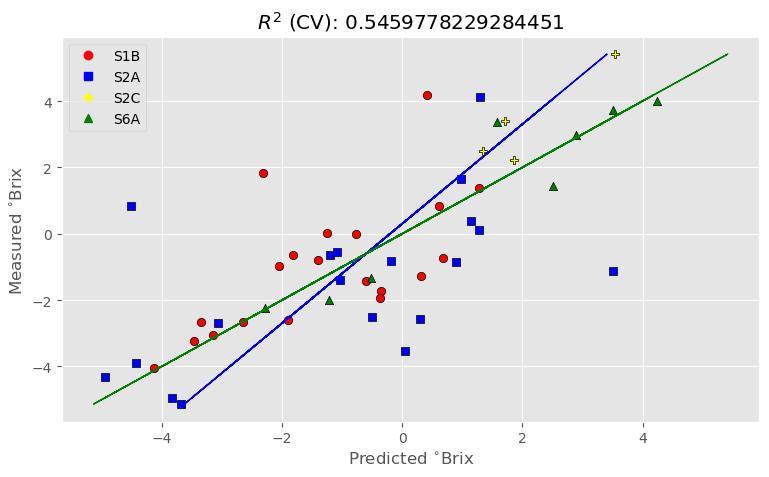

PLSRegression(n_components=19)

In [28]:

file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\d15n.csv'
simple_pls_cv(opt_Xc, y_weighted_d15n, ncomp, labels_d15n, file_name)

In [29]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=19, scale=True)
pls_final.fit(opt_Xc,y_weighted_d15n)


PLSRegression(n_components=19)

In [30]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [-2.46169497  1.62557201 -1.12481565 -4.11244372 -1.48969753]
Sklearn predictions: [-2.46169497  1.62557201 -1.12481565 -4.11244372 -1.48969753]
Max difference: 1.021405182655144e-14


In [31]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[-576.12235394461,
 9.312952533125642,
 -14.078178318107819,
 -10.95298643870669,
 -171.4067669255657,
 -53.290014707374375,
 340.3635581526955,
 38.66177021193481,
 -249.47227760841815,
 45.250701604441446,
 42.42255924892193,
 -78.68144375882595,
 -12.659934661679397,
 -11.157060519763505,
 -188.45498619336038,
 -2.203045959129758,
 207.8547604219892,
 305.56921685873175,
 220.47552145697415,
 -86.6160217394219,
 -37.769730995668326,
 78.70709831193402,
 -38.63063530227576,
 268.6137931556368,
 -72.32516477961666,
 85.64669251726099,
 15.914101915449452,
 -35.7897830744088,
 -64.37898322804465,
 -757.1169210324841,
 -153.03999963041116,
 -182.48688000935374,
 153.4965371904876,
 311.3909143648506,
 104.28417853770735,
 133.03734731403748,
 -211.68739335570646,
 428.4872671679126,
 181.69428978162378,
 -196.67279125725358,
 19.52502136135602,
 20.42061366714358,
 -170.2956987623206,
 -77.88425773129373,
 -331.3005428072536,
 -422.1965202706991,
 54.45955329188407,
 357.77412061056197,

In [32]:
transformed_intercept

array([-1.33739063])

# la


Optimised number of PLS components:  28
Wavelengths to be kept  71
Optimised MSEP  0.5756538073629729

R2 calib: 1.000
R2 CV: 0.727
0.5936655118273343 0.7363622550715863
0 S1B 2.6486463822208077 2.831109109942947
1 S1B 3.633588706063708 2.958748531923056
2 S1B 2.0442250034951632 2.562750069874877
3 S1B 3.662170817451316 3.0495296608515043
4 S1B 2.8050589724401647 3.209371340556637
5 S1B 2.2208511834521882 2.43062644287493
6 S1B 1.90854039044275 2.082911321477156
7 S1B 3.3599046660052188 2.566051314186708
8 S1B 2.523306839901954 1.4157694638426583
9 S1B 4.003519967346639 4.02907310785448
10 S1B 2.069544122304252 2.3894518649342746
11 S1B 2.4496002536603556 2.9339468821512855
12 S1B 2.597882234373918 2.3578955317225954
13 S1B 1.3123554586663106 1.9087718376263287
14 S1B 2.5979410451836804 2.651669193981665
15 S1B 1.2864736809829367 2.3363014541896954
16 S1B 2.7514687008360523 4.130112305506272
17 S1B 3.0300856080315617 2.497967968911676
18 S1B 4.354204997371523 3.8770588203920506
19 S1B

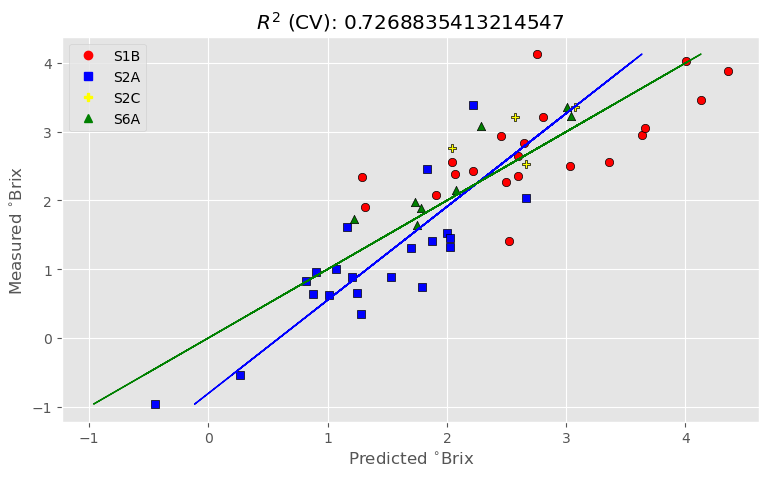

PLSRegression(n_components=28)

In [22]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_la, log_y_weighted_la, 30)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\la.csv'
simple_pls_cv(opt_Xc, log_y_weighted_la, ncomp, labels_la, file_name)

In [23]:
band_name[sorted_ind][wav:]

array(['b19_mean', 'b94_std', 'b27_std', 'b8_mean', 'b50_std', 'b29_mean',
       'b78_std', 'b30_std', 'b44_std', 'b14_mean', 'b68_mean',
       'b39_mean', 'b86_mean', 'b113_mean', 'b62_mean', 'b119_std',
       'b45_std', 'b79_std', 'b36_mean', 'b52_mean', 'b7_mean',
       'b53_mean', 'b94_mean', 'b72_mean', 'b92_mean', 'b44_mean',
       'b84_mean', 'b112_mean', 'b64_std', 'b91_std', 'b46_mean',
       'b107_std', 'b74_std', 'b10_std', 'b89_std', 'b5_std', 'b8_std',
       'b88_std', 'b122_mean', 'b34_mean', 'b55_mean', 'b50_mean',
       'b2_mean', 'b78_mean', 'b5_mean', 'b113_std', 'b121_std',
       'b1_mean', 'b106_std', 'b104_mean', 'b23_mean', 'b6_std',
       'b30_mean', 'b105_std', 'b114_mean', 'b74_mean', 'b103_std',
       'b32_mean', 'b16_mean', 'b100_std', 'b9_mean', 'b84_std',
       'b3_mean', 'b64_mean', 'b93_std', 'b118_std', 'b20_mean',
       'b92_std', 'b24_mean', 'b17_mean', 'b22_mean'], dtype='<U9')

In [24]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=28)
pls_final.fit(opt_Xc,log_y_weighted_la)



PLSRegression(n_components=28)

In [25]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [2.80686618 2.94980843 2.5513144  3.03401766 3.18391962]
Sklearn predictions: [2.80686618 2.94980843 2.5513144  3.03401766 3.18391962]
Max difference: 4.884981308350689e-15


In [26]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[73.43332945115424,
 1.8997071890983306,
 -4.491064038156993,
 -94.3073208396375,
 11.370152240599866,
 6.684057739210883,
 -17.37233750941516,
 -36.55411910672085,
 25.83174613599107,
 -157.33146854618656,
 -135.19597313847248,
 77.12165081708605,
 59.99373576156026,
 -40.443119156803256,
 -168.66580745203618,
 -7.901684152532362,
 7.503367813090542,
 5.578642587316881,
 240.0377767255638,
 211.68909284247232,
 51.08812869986964,
 -84.0047454176666,
 -185.52209469637157,
 109.44052379855532,
 -246.58350519974852,
 -95.6942755183521,
 -48.89093692706882,
 -113.82539343467575,
 39.92044951290615,
 7.558960927578383,
 -44.444525648127474,
 1.1626740772228747,
 -20.94643182989812,
 35.29212008688127,
 -1.3465506803452922,
 26.63026088080052,
 36.231940090125875,
 -43.81384109253915,
 -200.98510258832567,
 -278.4289688211392,
 -15.190023760466007,
 259.4251606170992,
 25.222293740004723,
 162.7808405426492,
 -108.19812140906629,
 -6.482932290214733,
 -5.081460661941372,
 -41.09827756378587

In [27]:
transformed_intercept

array([3.10610339])

# SLA


Optimised number of PLS components:  17
Wavelengths to be kept  49
Optimised MSEP  0.16582029599327838

R2 calib: 0.981
R2 CV: 0.737
0.6592784664299206 0.8508469234146641
0 S1B 5.068676663464614 4.955948567824229
1 S1B 5.132924599095856 4.922298299358316
2 S1B 4.777977725038048 4.6848422323707855
3 S1B 4.813617291506361 4.815337757279735
4 S1B 4.741990396170559 4.773997165237631
5 S1B 4.474263808448814 4.544735888891621
6 S1B 4.563632412413124 4.692155257922741
7 S1B 4.2895589055221945 4.549450435602308
8 S1B 4.466814597466166 4.489234027672727
9 S1B 4.892715657634238 4.641577194934574
10 S1B 4.7708113951039826 4.733111538329998
11 S1B 4.752971545981802 4.661362096296028
12 S1B 4.615477459214834 4.683412078540948
13 S1B 4.7324642188951955 4.946873945464339
14 S1B 4.587281877830222 4.521344729650312
15 S1B 4.700562254758815 4.656390420260098
16 S1B 4.6290715598707095 4.850850899830345
17 S1B 5.070814899440032 4.84553197668687
18 S1B 4.525625602206467 4.739598766319705
19 S2A 4.88126861

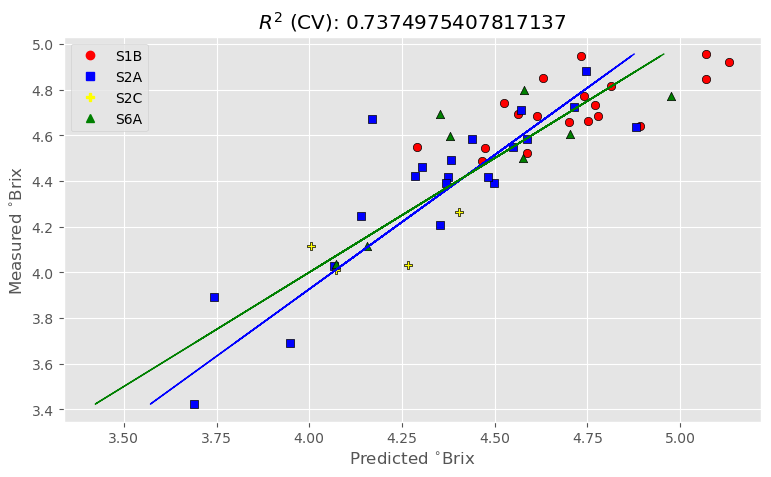

PLSRegression(n_components=17)

In [22]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_sla, log_y_weighted_sla, 20)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\sla.csv'
simple_pls_cv(opt_Xc, log_y_weighted_sla, ncomp, labels_sla, file_name)

In [23]:
band_name[sorted_ind][wav:]

array(['b72_std', 'b75_std', 'b108_std', 'b117_mean', 'b76_mean',
       'b118_mean', 'b92_mean', 'b106_std', 'b11_mean', 'b59_std',
       'b57_mean', 'b60_mean', 'b82_mean', 'b84_mean', 'b9_mean',
       'b30_mean', 'b25_std', 'b14_mean', 'b119_mean', 'b107_std',
       'b50_std', 'b113_std', 'b28_mean', 'b62_mean', 'b36_mean',
       'b78_mean', 'b121_std', 'b116_std', 'b45_mean', 'b60_std',
       'b34_mean', 'b13_mean', 'b50_mean', 'b110_std', 'b18_mean',
       'b48_mean', 'b102_std', 'b74_std', 'b58_mean', 'b15_mean',
       'b16_mean', 'b3_mean', 'b1_mean', 'b120_std', 'b84_std', 'b92_std',
       'b94_std', 'b20_mean', 'b24_mean'], dtype='<U9')

In [24]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=17, scale=True)
pls_final.fit(opt_Xc,log_y_weighted_sla)

PLSRegression(n_components=17)

In [25]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [5.00753504 4.94690122 4.65760755 4.78259617 4.7012656 ]
Sklearn predictions: [5.00753504 4.94690122 4.65760755 4.78259617 4.7012656 ]
Max difference: 8.881784197001252e-16


In [26]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[13.269053386456577,
 5.165043241232997,
 -1.5641799002623296,
 1.4568778181548874,
 -16.22432088735851,
 11.078049638731049,
 45.777743757338186,
 -8.880354503037045,
 62.742956311126896,
 5.6095639337463945,
 -48.37386545946345,
 63.86159939470035,
 -31.50502526608233,
 75.28972012240871,
 -57.61197265970777,
 70.5365272481941,
 -1.318041130551061,
 -157.21038467699796,
 -4.766606050411134,
 -0.6119483035919295,
 -13.30041195574362,
 -5.69491836043027,
 25.834713336991474,
 49.69578137948292,
 100.68863818657829,
 -91.4254461302191,
 -0.8282115357919111,
 3.963911471410904,
 74.80991805779874,
 19.361761401991174,
 10.70085073697241,
 7.071596054687984,
 -110.73991400952632,
 5.924271490826645,
 70.66981734923884,
 -166.76012878454148,
 -6.2165952829508395,
 -9.21418912751985,
 60.637244479863746,
 -74.01476430401166,
 -39.09665063439348,
 34.96218970802866,
 -13.777318827201885,
 5.446375233145134,
 -12.865023035879181,
 -20.345838104626345,
 19.12541535531896,
 207.34697428447035,


In [27]:
transformed_intercept

array([4.11271017])

# LDMC


Optimised number of PLS components:  28
Wavelengths to be kept  52
Optimised MSEP  0.36652970753273645

R2 calib: 0.996
R2 CV: 0.615
-0.1332336988921515 0.7828588924538165
0 S1B -0.8577550316281953 -0.9184397819289111
1 S1B -1.6482600708289126 -0.97227151645054
2 S1B -1.0390835656107393 -0.7890678740898547
3 S1B -1.3995891988967926 -0.9314015168963943
4 S1B -1.2226144651448876 -1.0373097291739493
5 S1B -0.7163795654699013 -0.8080338619527949
6 S1B -1.2605700281431296 -0.778369253854089
7 S1B -0.9201421716383221 -0.9022429481473144
8 S1B -0.5393496534403692 -0.808654416065107
9 S1B -1.2408494316091163 -0.9135200487640038
10 S1B -0.5374413169941988 -0.8999872980521808
11 S1B -0.43654390196514586 -0.9198350831728483
12 S1B -0.6682515965837394 -0.7051586523254038
13 S1B -0.7183262652244009 -0.853767692017632
14 S1B -0.855652358824208 -0.9315144366550555
15 S1B -0.7541567015273571 -0.8536054840183717
16 S1B -1.1738584907523322 -0.9285608731079459
17 S1B -0.5516966891084352 -0.9174878731619

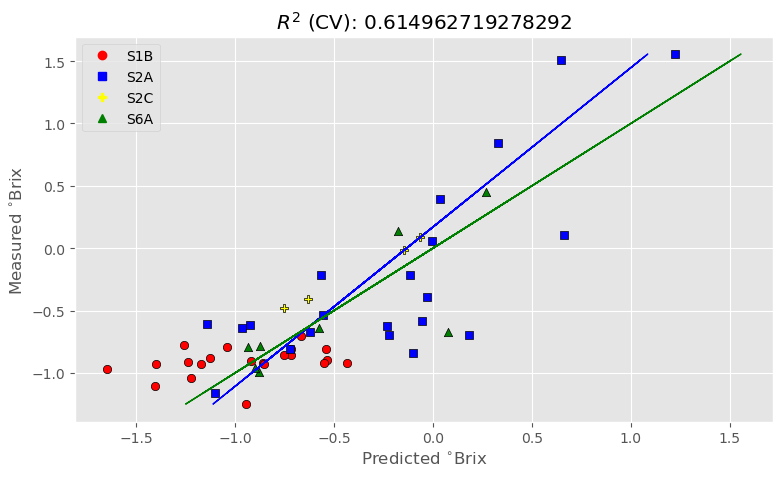

PLSRegression(n_components=28)

In [22]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_ldmc, log_y_weighted_LDMC, 30)
file_name = r'D:\wenqu\chapter1_2\plot_level_model\244\ldmc.csv'
simple_pls_cv(opt_Xc, log_y_weighted_LDMC, ncomp, labels_ldmc, file_name)

In [29]:
band_name[sorted_ind][wav:]

array(['b66_mean', 'b108_mean', 'b107_std', 'b94_mean', 'b42_mean',
       'b106_std', 'b114_std', 'b108_std', 'b91_std', 'b1_std', 'b44_std',
       'b57_mean', 'b117_mean', 'b12_mean', 'b86_std', 'b72_std',
       'b48_mean', 'b25_std', 'b49_mean', 'b43_mean', 'b74_mean',
       'b11_mean', 'b105_mean', 'b70_mean', 'b121_std', 'b110_std',
       'b119_mean', 'b88_std', 'b84_mean', 'b45_mean', 'b113_std',
       'b121_mean', 'b21_mean', 'b2_mean', 'b32_mean', 'b28_mean',
       'b111_std', 'b7_mean', 'b66_std', 'b24_mean', 'b16_mean',
       'b84_std', 'b58_mean', 'b37_mean', 'b92_std', 'b20_mean',
       'b5_mean', 'b101_std', 'b1_mean', 'b8_mean', 'b10_mean',
       'b102_std'], dtype='<U9')

In [23]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=28, scale=True)
pls_final.fit(opt_Xc,log_y_weighted_LDMC)


PLSRegression(n_components=28)

In [24]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [-0.97568537 -0.95194    -0.7938137  -0.97664442 -1.04182814]
Sklearn predictions: [-0.97568537 -0.95194    -0.7938137  -0.97664442 -1.04182814]
Max difference: 5.440092820663267e-15


In [25]:
transformed_intercept

array([-0.63745392])

In [26]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[155.85947095614563,
 -19.295655467861216,
 -13.288417190009008,
 281.13836305344444,
 413.9045066510239,
 -15.744581484856262,
 7.3607782115283555,
 -44.92360620742513,
 -14.745478972515269,
 21.154589415389317,
 15.24786631048062,
 70.58070243510097,
 -9.887005755701429,
 125.32712925971929,
 38.77429621799765,
 -21.95071462168769,
 -144.37511656441998,
 -10.494586315518633,
 -28.970141721320783,
 89.71945820799857,
 -233.82076671408558,
 -64.7606429837618,
 44.81159605686545,
 -12.85790252465078,
 5.79567487970964,
 -21.90337929616464,
 -46.39386184998719,
 -41.581069334533574,
 -167.86607341929522,
 -107.77426870702352,
 9.229822548006904,
 -9.265254285519836,
 -62.566475346085085,
 -21.521976164842847,
 -566.1340776343646,
 -124.46875457877653,
 6.070320250312625,
 -2.115522024251851,
 -49.740950987015175,
 322.61630971182586,
 410.9138338564743,
 56.979917926117004,
 67.99368714891327,
 64.42762844493538,
 37.360247092877906,
 -340.23554110409754,
 24.89496544916215,
 11.24131000